## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.

combined_df["Mouse ID"].value_counts()

g989    13
l725    10
l471    10
i635    10
o562    10
        ..
f932     1
n482     1
h428     1
t573     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_df[["Mouse ID", "Timepoint"]].value_counts()

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_df.set_index("Mouse ID")


In [9]:
new_duplicate_df = duplicate_df.loc["g989", :]
new_duplicate_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = duplicate_df.drop(index = 'g989')
clean_data_df = clean_data_df.reset_index()
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].value_counts()

l725    10
t724    10
i635    10
o562    10
k862    10
        ..
o848     1
b447     1
x336     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

regimen_group = clean_data_df.groupby("Drug Regimen")





In [15]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
median = round(regimen_group["Tumor Volume (mm3)"].median(),2)
variance = round(regimen_group["Tumor Volume (mm3)"].var(),2)
std = round(regimen_group["Tumor Volume (mm3)"].std(),2)
SEM = round(regimen_group["Tumor Volume (mm3)"].sem(),2)


In [16]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_agg = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
regimen_agg.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

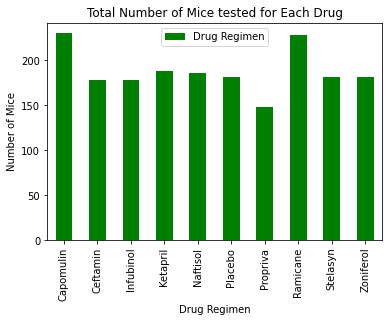

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_df = pd.DataFrame(regimen_group["Drug Regimen"].count())
count_bar = drug_regimen_df.plot(kind = "bar", title = "Total Number of Mice tested for Each Drug", color="green")

count_bar.set_ylabel("Number of Mice")
count_bar.set_xlabel("Drug Regimen")


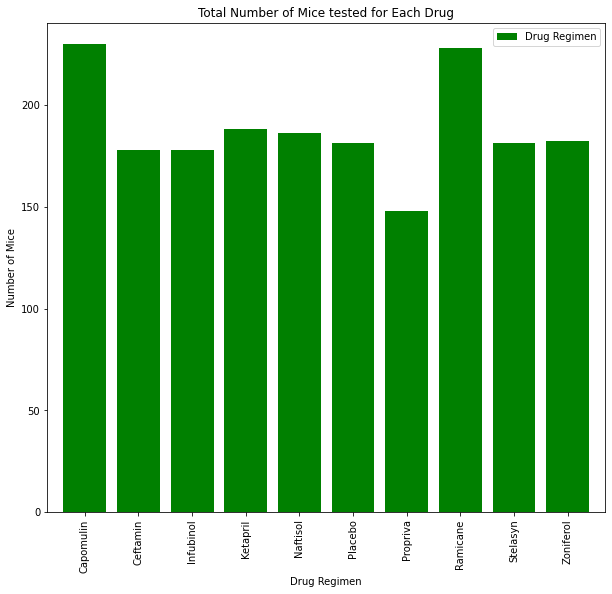

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(drug_regimen_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize = (10,9))
plt.bar(x_axis, drug_regimen_df["Drug Regimen"], color="green", align="center")
plt.xticks(tick_locations, list(drug_regimen_df.index), rotation = "vertical")

plt.xlim(-.7, len(x_axis)-.3)
plt.ylim(0, max(drug_regimen_df["Drug Regimen"])+10)

plt.title("Total Number of Mice tested for Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
column_name = ["Drug Regimen"]

plt.legend(column_name, loc ="best")
plt.show()

<AxesSubplot:title={'center':' Distribution of Female vs. Male Mice'}, ylabel='Sex'>

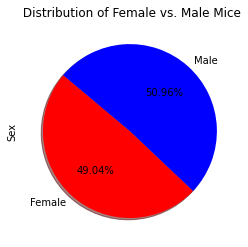

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = clean_data_df.groupby("Sex")
gender_mice_df = pd.DataFrame(gender_mice["Sex"].count())

gender_mice_df.plot(kind="pie", 
                    y= "Sex", 
                    title = " Distribution of Female vs. Male Mice", 
                    autopct = "%1.2f%%", 
                    shadow = True, 
                    startangle = 140, 
                    colors=["red","blue"], 
                    legend=False)

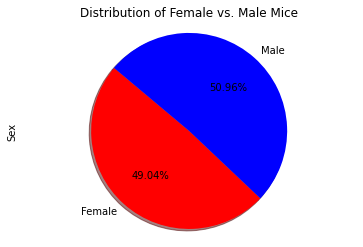

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = list(gender_mice_df.index.values)
gender_count = gender_mice_df["Sex"]
colors = ["red", "blue"]
plt.pie(gender_count, labels=genders, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_regimens = clean_data_df[clean_data_df["Drug Regimen"].isin(four_regimens_list)]


In [60]:
# Start by getting the last (greatest) timepoint for each mouse
final_tumor = four_regimens[four_regimens['Timepoint'] == four_regimens['Timepoint'].max()]




In [61]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_final_df = pd.merge(final_tumor, clean_data_df, on=["Timepoint", "Mouse ID"], how="inner")
merged_final_df


,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,Capomulin,Female,3,17,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,Capomulin,Female,16,15,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660,3,Ceftamin,Male,3,29,61.386660,3
59,y163,Infubinol,Female,17,27,45,67.685569,3,Infubinol,Female,17,27,67.685569,3
60,y769,Ceftamin,Female,6,27,45,68.594745,4,Ceftamin,Female,6,27,68.594745,4
61,y865,Ceftamin,Male,23,26,45,64.729837,3,Ceftamin,Male,23,26,64.729837,3


In [62]:
del merged_final_df["Metastatic Sites_x"]
del merged_final_df["Metastatic Sites_y"]
del merged_final_df["Drug Regimen_y"]
del merged_final_df["Sex_y"]
del merged_final_df["Age_months_y"]
del merged_final_df["Weight (g)_y"]
del merged_final_df["Tumor Volume (mm3)_y"]

merged_final_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472
...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660
59,y163,Infubinol,Female,17,27,45,67.685569
60,y769,Ceftamin,Female,6,27,45,68.594745
61,y865,Ceftamin,Male,23,26,45,64.729837


In [63]:
merged_final_df = merged_final_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x":"Age in Months",
                                               "Weight (g)_x": "Weight (g)", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
merged_final_df

,Mouse ID,Drug Regimen,Sex,Age in Months,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472
...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660
59,y163,Infubinol,Female,17,27,45,67.685569
60,y769,Ceftamin,Female,6,27,45,68.594745
61,y865,Ceftamin,Male,23,26,45,64.729837


In [64]:
# Put treatments into a list for for loop (and later for plot labels)

tumor_vol_list = []

# Create empty list to fill with tumor vol data (for plotting)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for drug in four_regimens_list:
    drugs_vol = merged_final_df.loc[merged_final_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumor_vol_list.append(drugs_vol)
    quartiles = drugs_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    print(f"-----------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")

-----------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 37.31 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
-----------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 30.98
The upper quartile of Ramicane is: 38.51
The interquartile range of Ramicane is: 7.53
The the median of Ramicane is: 34.85 
Values below 19.69 for Ramicane could be outliers.
Values above 49.8 for Ramicane could be outliers.
-----------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 62.75
The upper quartile of Infubinol is: 67.69
The interquartile range of Infubinol is: 4.94
The the median of Infubinol is: 66.08 
Values below 55.34 for Infubinol could be ou

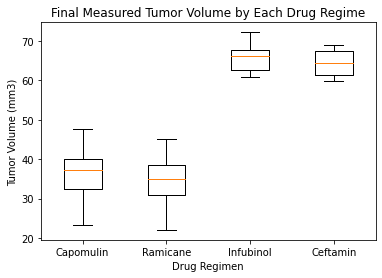

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.boxplot(tumor_vol_list, flierprops = dict(markerfacecolor='red',markersize=12))
ax.set_title("Final Measured Tumor Volume by Each Drug Regime")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], four_regimens_list)
plt.show()

## Line and Scatter Plots

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


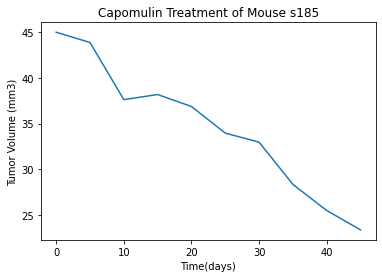

In [70]:
capo_mice = capomulin_data.loc[capomulin_data["Mouse ID"]=="s185"]
time_series = capo_mice["Timepoint"]
plt.plot(time_series, capo_mice["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mouse = capomulin_data.groupby("Mouse ID").mean()
cap_mouse_df = pd.DataFrame(cap_mouse)
cap_mouse_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


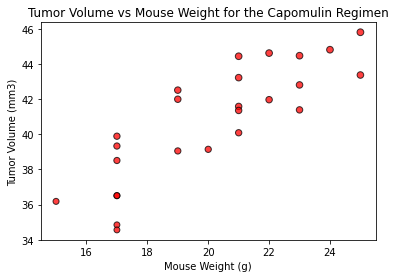

In [73]:

plt.scatter(cap_mouse_df["Weight (g)"], cap_mouse_df["Tumor Volume (mm3)"], marker = "o", facecolors="red", edgecolors="black", s=cap_mouse_df["Tumor Volume (mm3)"], alpha=.75)
plt.title("Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.8419363424694718
The equation of the regression line is: y= 0.95x + 21.55


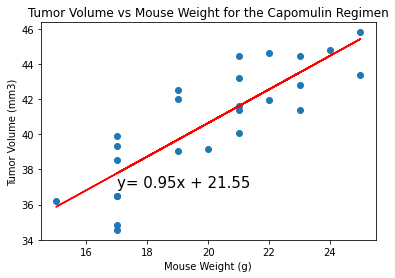

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mouse_df["Weight (g)"]
y_values = cap_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (17,37), fontsize=15, color="black")
plt.title("Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()